# Task 1-2
Take 1 thousand random passages from the FIQA-PL corpus.

In [1]:
import spacy

import pandas as pd

In [2]:
corpus_df = pd.read_json(f"./data/corpus.jsonl", lines=True)
corpus_df = corpus_df.set_index("_id").sort_index()
corpus_df.head()

,title,text,metadata
_id,,,
3,,"Nie mówię, że nie podoba mi się też pomysł szk...",{}
31,,Tak więc nic nie zapobiega fałszywym ocenom po...,{}
56,,Nigdy nie możesz korzystać z FSA dla indywidua...,{}
59,,Samsung stworzył LCD i inne technologie płaski...,{}
63,,Oto wymagania SEC: Federalne przepisy dotycząc...,{}


In [3]:
passages = [row["text"] for _, row in corpus_df.sample(1000).iterrows()]

# Task 3
Use the lemmatized and sentence split documents to identify the expressions that consist of consecutive words starting with a capital letter.

In [4]:
from typing import Sequence


polish = spacy.load("pl_core_news_sm")


def get_lemmatized_capitalized_expressions(corpus: Sequence[str], lang = polish):
    for passage in lang.pipe(corpus):

        for sentence in passage.sents:
            seq = []
            
            for i, token in enumerate(sentence):

                if i > 0 and token.text.istitle():
                    seq.append(token.lemma_)
                
                elif any(seq):
                    yield " ".join(seq)
                    seq = []

In [5]:
example_text = "Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych."

for item in get_lemmatized_capitalized_expressions([example_text]):
    print(item)

Kraków
Polska
Stany Zjednoczone


# Task 4
Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [6]:
def count(items):
    items_freq = {}
    for item in items:
        items_freq[item] = items_freq.get(item, 0) + 1
    return items_freq


def order_by_values(d: dict):
    return sorted([(k, v) for k, v in d.items()], key=lambda kv: kv[1], reverse=True)

In [7]:
N = 50

order_by_values(count(get_lemmatized_capitalized_expressions(passages)))[:N]

[('twój', 150),
 ('ty', 116),
 ('Twój', 43),
 ('Stany Zjednoczone', 39),
 ('nie', 38),
 ('Ciebie', 35),
 ('Roth', 34),
 ('to', 32),
 ('Indie', 26),
 ('w', 25),
 ('jeśli', 25),
 ('Twoją', 21),
 ('czy', 21),
 ('być', 18),
 ('K', 17),
 ('X', 17),
 ('Google', 16),
 ('Internet', 15),
 ('S&P', 15),
 ('Chiny', 14),
 ('tak', 14),
 ('Wielki Brytania', 14),
 ('Ameryka', 13),
 ('Twojej', 12),
 ('B', 12),
 ('mieć', 11),
 ('po', 11),
 ('Miami', 11),
 ('Kanada', 10),
 ('A', 10),
 ('Excel', 9),
 ('jak', 9),
 ('Wall Street', 9),
 ('Rosja', 9),
 ('Twojego', 9),
 ('myśleć', 8),
 ('wersja', 8),
 ('Australia', 8),
 ('Fed', 8),
 ('Europa', 8),
 ('Kalifornia', 8),
 ('china', 8),
 ('Amerykanin', 8),
 ('Twoich', 8),
 ('amator', 8),
 ('słowo', 7),
 ('Apple', 7),
 ('John', 7),
 ('i', 7),
 ('Target', 7)]

# Task 5-6
Apply the NER from SpaCy to identify the named entities in the same set of documents.
Plot the frequency (histogram) of the identified classes.

In [8]:
def get_named_entities(corpus: Sequence[str], lang = polish):
    for passage in lang.pipe(corpus):
        for entity in passage.ents:
            yield entity

In [9]:
named_entities = list(get_named_entities(passages))

In [10]:
def map_tokens(tokens, mapping):
    for token in tokens:
        yield mapping(token)


get_named_entities_lemmatizations = lambda entities: map_tokens(entities, lambda entity: entity.lemma_)
get_named_entities_labels = lambda entities: map_tokens(entities, lambda entity: entity.label_)

In [11]:
named_entities_labels = get_named_entities_labels(named_entities)
label_counts = count(named_entities_labels)

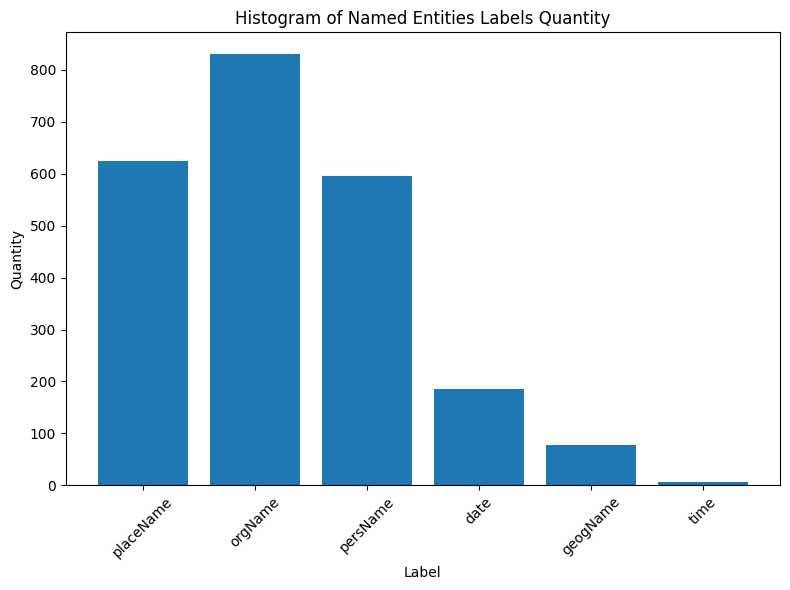

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.bar(list(label_counts.keys()), list(label_counts.values()))
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.title("Histogram of Named Entities Labels Quantity")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task 7
Display 10 most frequent Named Entities for each identified type.

In [13]:
def top_named_entities_by_label(named_entities):
    named_entities_lemma = list(get_named_entities_lemmatizations(named_entities))
    named_entities_labels = list(get_named_entities_labels(named_entities))

    labels = set(named_entities_labels)
    labels_named_eneties = {label: [] for label in labels}

    for label, lemma in zip(named_entities_labels, named_entities_lemma):
        labels_named_eneties[label].append(lemma)

    for label, entites in labels_named_eneties.items():
        labels_named_eneties[label] = order_by_values(count(entites))

    return labels_named_eneties

In [14]:
labels_top_named_eneties = top_named_entities_by_label(named_entities)

pd.DataFrame(
    {
        label: entites[:min(10, len(entites))] + [None for _ in range(10 - min(10, len(entites)))] 
        for label, entites in labels_top_named_eneties.items()
    }
)

,geogName,time,date,persName,orgName,placeName
0,"(Europa, 9)","(godzina 14, 1)","(2012 rok., 6)","(gdyby być, 15)","(IRA, 55)","(USA, 91)"
1,"(D'Atlantis, 5)","(1., 1)","(rok 2008, 5)","(Amazon, 10)","(ETF, 23)","(amerykański, 38)"
2,"(Ameryka, 4)","(50, 1)","(2014 rok., 5)","(Trump, 9)","(Google, 16)","(Stany Zjednoczone, 38)"
3,"(Wall Street, 2)","(godzina., 1)","(styczeń, 4)","(John, 7)","(Roth IRA, 15)","(Indie, 27)"
4,"(Azja, 2)","(godzina 16., 1)","(2010, 4)","(Excel, 7)","(LLC, 15)","(Wielki Brytania, 15)"
5,"(Galaktyka, 1)","(00, 1)","(2008 rok, 4)","(Gruber, 7)","(NYSE, 12)","(Chiny, 14)"
6,"(Dochód, 1)","(14, 1)","(201304, 4)","(sald, 7)","(S&P, 11)","(Ameryka, 12)"
7,"(NASDAQ, 1)",None,"(2015 rok, 3)","(Ford, 6)","(GE, 11)","(Kanada, 10)"
8,"(kanadyjski, 1)",None,"(rok 90., 3)","(Portoryko, 5)","(SEC, 10)","(Miami, 10)"
9,"(mcDonald's, 1)",None,"(2012 rok, 3)","(walmart, 5)","(CC, 10)","(Kalifornia, 8)"


# Task 8
Display 50 most frequent Named Entities including their count and type.

In [15]:
named_entities_lemma = get_named_entities_lemmatizations(named_entities)
named_entities_labels = get_named_entities_labels(named_entities)

order_by_values(
    count(
        [(lemma, label) for lemma, label in zip(named_entities_lemma, named_entities_labels)]
    )
)[:N]

[(('USA', 'placeName'), 91),
 (('IRA', 'orgName'), 55),
 (('amerykański', 'placeName'), 38),
 (('Stany Zjednoczone', 'placeName'), 38),
 (('Indie', 'placeName'), 27),
 (('ETF', 'orgName'), 23),
 (('Google', 'orgName'), 16),
 (('Wielki Brytania', 'placeName'), 15),
 (('Roth IRA', 'orgName'), 15),
 (('gdyby być', 'persName'), 15),
 (('LLC', 'orgName'), 15),
 (('Chiny', 'placeName'), 14),
 (('NYSE', 'orgName'), 12),
 (('Ameryka', 'placeName'), 12),
 (('S&P', 'orgName'), 11),
 (('GE', 'orgName'), 11),
 (('Amazon', 'persName'), 10),
 (('Kanada', 'placeName'), 10),
 (('SEC', 'orgName'), 10),
 (('Miami', 'placeName'), 10),
 (('CC', 'orgName'), 10),
 (('Trump', 'persName'), 9),
 (('Europa', 'geogName'), 9),
 (('HSA', 'orgName'), 9),
 (('FDIC', 'orgName'), 8),
 (('Kalifornia', 'placeName'), 8),
 (('china', 'placeName'), 8),
 (('Roth', 'orgName'), 8),
 (('Rosja', 'placeName'), 8),
 (('IBM', 'orgName'), 8),
 (('Apple', 'orgName'), 7),
 (('Australia', 'placeName'), 7),
 (('John', 'persName'), 7),


# Task 9
Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color.

In [16]:
from spacy import displacy

In [17]:
def display_named_entites_in_sentences(corpus: Sequence[str], lang=polish, limit=5, min_types=2):
    count = 0

    for passage in corpus:

        for sentence in lang(passage).sents:
            labels = set()

            for entity in sentence.ents:
                labels.add(entity.label_)

            if len(labels) >= min_types:
                displacy.render(sentence, style="ent")
                count += 1

            if count == limit:
                return

In [18]:
display_named_entites_in_sentences(passages)

# Questions

## Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

The NER method works much better. It's not perfect, but unlike counting expressions with capital letters, it returns significantly fewer examples that are not proper names.

## What are the drawbacks of the method based on capital letters?

The problem with the method based on capitalizing expressions is that expressions that are proper names may be at the beginning of a sentence and there may be expressions that are written with a capital letter and are not proper names, such as polite phrases or simple mistakes. Besides, this method would not work at all for languages like German.

## What are the drawbacks of the method based on NER?

It often incorrectly assigns expressions to classes and cannot deal with expressions with the same meaning, such as "USA" and "Stany Zjednoczone".

## Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

The best results are for dates and organizations, the worst for person names.

## Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

Are not. Perhaps a solution would be to create a dictionary of synonyms. In the first step, we collect proper names, then we check their semantic similarity using some model and create such a dictionary.

## Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

This could be used to create articles with automatic finding of links to references. For example, when writing a text, a proper name appears, this tool will detect and insert a hyperlink to the Wikipedia article.